In [3]:
import pandas as pd

# 读取Excel文件
file_path = r"C:\Users\huangshiting\Desktop\online_retail.xlsx"
data = pd.read_excel(file_path)

# 打印原始数据的基本信息
print("原始数据基本信息：")
print(data.info())
print("\n原始数据的前几行：")
print(data.head())

# 1. 去除重复数据
data = data.drop_duplicates()
print("\n去除重复数据后的行数：", len(data))

# 2. 处理缺失值
# 假设我们对某些关键字段（如InvoiceNo、CustomerID）不允许有缺失值，直接删除这些记录
data = data.dropna(subset=['InvoiceNo', 'CustomerID'])
print("\n处理缺失值后的行数：", len(data))

# 对其他字段（如Description、CustomerID），可以选择填充缺失值
# 这里以Description为例，用空字符串填充
data['Description'].fillna('', inplace=True)

# 3. 数据筛选：去除无关特征
# 假设我们只关心以下特征：InvoiceNo、InvoiceDate、CustomerID、Quantity、InvoiceNo、UnitPrice
relevant_features = ['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Quantity', 'UnitPrice']
data = data[relevant_features]

print("\n筛选后的数据列：")
print(data.columns)

# 保存预处理后的数据到新的Excel文件
output_path = r"C:\Users\huangshiting\Desktop\preprocessed_online_retail.xlsx"
data.to_excel(output_path, index=False)

print("\n预处理后的数据已保存到：", output_path)

原始数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

原始数据的前几行：
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  Cu

In [4]:
import pandas as pd
import numpy as np

# 读取预处理后的数据
file_path = r"C:\Users\huangshiting\Desktop\preprocessed_online_retail.xlsx"
data = pd.read_excel(file_path)

# 计算基本统计指标
print("基本统计指标：")
print("平均购买数量：", np.mean(data['Quantity']))
print("购买数量的中位数：", np.median(data['Quantity']))
print("购买数量的标准差：", np.std(data['Quantity']))

# 计算单价的基本统计指标
print("平均单价：", np.mean(data['UnitPrice']))
print("单价的中位数：", np.median(data['UnitPrice']))
print("单价的标准差：", np.std(data['UnitPrice']))

# 比较不同特征的统计指标
print("\n不同特征的统计指标比较：")
print(data[['Quantity', 'UnitPrice']].describe())

# 找出数据中的异常点
# 假设购买数量和单价的异常点为超出3倍标准差的值
mean_quantity = np.mean(data['Quantity'])
std_quantity = np.std(data['Quantity'])
mean_unitprice = np.mean(data['UnitPrice'])
std_unitprice = np.std(data['UnitPrice'])

# 标记异常点
data['Quantity_Outlier'] = np.abs(data['Quantity'] - mean_quantity) > 3 * std_quantity
data['UnitPrice_Outlier'] = np.abs(data['UnitPrice'] - mean_unitprice) > 3 * std_unitprice

# 打印异常点数量
print("\n异常点数量：")
print("购买数量异常点数量：", np.sum(data['Quantity_Outlier']))
print("单价异常点数量：", np.sum(data['UnitPrice_Outlier']))

# 打印异常点
print("\n购买数量异常点：")
print(data[data['Quantity_Outlier']])
print("\n单价异常点：")
print(data[data['UnitPrice_Outlier']])

# 分析规律
# 计算每个客户的平均购买数量和平均单价
customer_stats = data.groupby('CustomerID').agg({
    'Quantity': np.mean,
    'UnitPrice': np.mean
}).reset_index()
customer_stats.columns = ['CustomerID', 'Avg_Quantity', 'Avg_UnitPrice']

print("\n每个客户的平均购买数量和平均单价：")
print(customer_stats.head())

# 保存统计结果到新的Excel文件
output_path = r"C:\Users\huangshiting\Desktop\stats_online_retail.xlsx"
customer_stats.to_excel(output_path, index=False)

print("\n统计结果已保存到：", output_path)

基本统计指标：
('\xe5\xb9\xb3\xe5\x9d\x87\xe8\xb4\xad\xe4\xb9\xb0\xe6\x95\xb0\xe9\x87\x8f\xef\xbc\x9a', 12.183272576966365)
('\xe8\xb4\xad\xe4\xb9\xb0\xe6\x95\xb0\xe9\x87\x8f\xe7\x9a\x84\xe4\xb8\xad\xe4\xbd\x8d\xe6\x95\xb0\xef\xbc\x9a', 5.0)
('\xe8\xb4\xad\xe4\xb9\xb0\xe6\x95\xb0\xe9\x87\x8f\xe7\x9a\x84\xe6\xa0\x87\xe5\x87\x86\xe5\xb7\xae\xef\xbc\x9a', 250.2827255399912)
('\xe5\xb9\xb3\xe5\x9d\x87\xe5\x8d\x95\xe4\xbb\xb7\xef\xbc\x9a', 3.47406363979831)
('\xe5\x8d\x95\xe4\xbb\xb7\xe7\x9a\x84\xe4\xb8\xad\xe4\xbd\x8d\xe6\x95\xb0\xef\xbc\x9a', 1.95)
('\xe5\x8d\x95\xe4\xbb\xb7\xe7\x9a\x84\xe6\xa0\x87\xe5\x87\x86\xe5\xb7\xae\xef\xbc\x9a', 69.76394820732074)

不同特征的统计指标比较：
            Quantity      UnitPrice
count  401604.000000  401604.000000
mean       12.183273       3.474064
std       250.283037      69.764035
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000

异常点数量：
(


每个客户的平均购买数量和平均单价：
   CustomerID  Avg_Quantity  Avg_UnitPrice
0       12346      1.040000       0.000000
1       12347      2.644011      13.505495
2       12348      5.764839      75.516129
3       12349      8.289041       8.643836
4       12350      3.841176      11.588235
('\n\xe7\xbb\x9f\xe8\xae\xa1\xe7\xbb\x93\xe6\x9e\x9c\xe5\xb7\xb2\xe4\xbf\x9d\xe5\xad\x98\xe5\x88\xb0\xef\xbc\x9a', 'C:\\Users\\huangshiting\\Desktop\\stats_online_retail.xlsx')


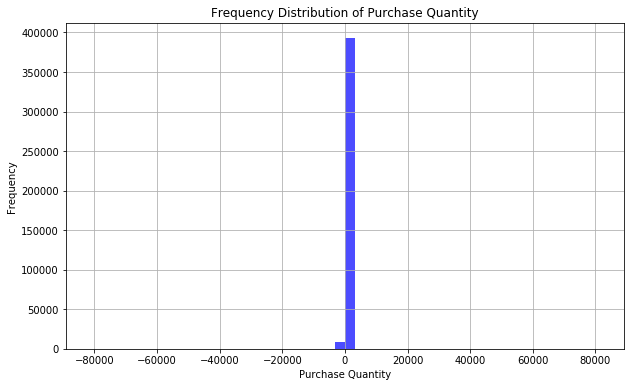

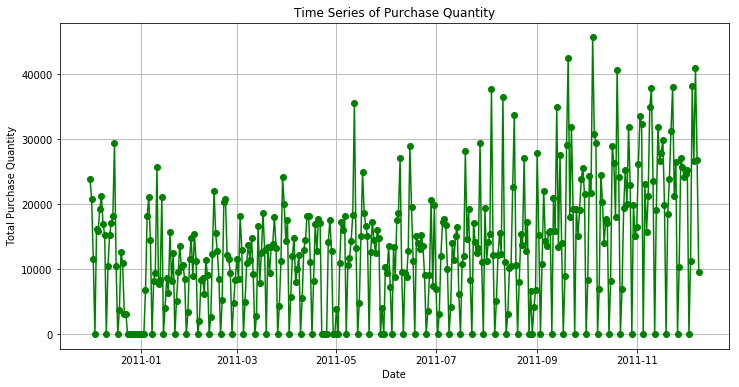

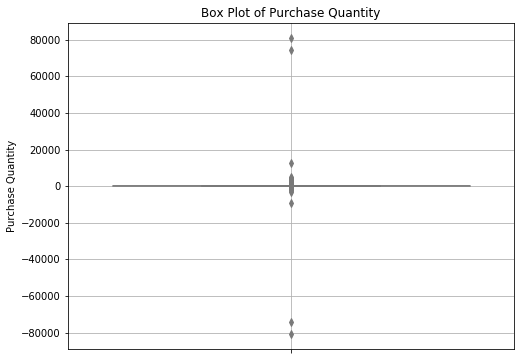

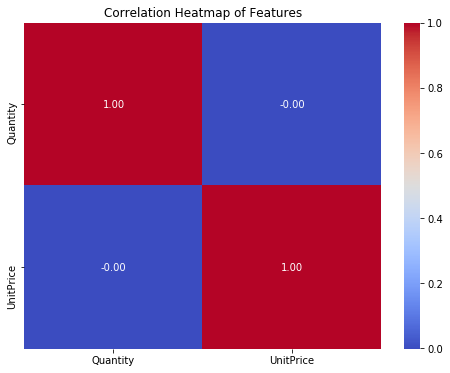

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取预处理后的数据
file_path = r"C:\Users\huangshiting\Desktop\preprocessed_online_retail.xlsx"
data = pd.read_excel(file_path)

# 1. 频率分布图：绘制用户购买数量的频率分布图
plt.figure(figsize=(10, 6))
plt.hist(data['Quantity'], bins=50, color='blue', alpha=0.7)
plt.title('Frequency Distribution of Purchase Quantity')
plt.xlabel('Purchase Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. 时间序列图：绘制用户购买行为的时间序列图
# 将InvoiceDate转换为datetime类型
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.set_index('InvoiceDate', inplace=True)

# 按天统计购买数量
daily_purchases = data.resample('D').sum()['Quantity']

plt.figure(figsize=(12, 6))
plt.plot(daily_purchases.index, daily_purchases.values, marker='o', linestyle='-', color='green')
plt.title('Time Series of Purchase Quantity')
plt.xlabel('Date')
plt.ylabel('Total Purchase Quantity')
plt.grid(True)
plt.show()

# 3. 箱线图：绘制购买数量的箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Quantity'], color='lightblue')
plt.title('Box Plot of Purchase Quantity')
plt.ylabel('Purchase Quantity')
plt.grid(True)
plt.show()

# 4. 热力图：绘制特征之间的相关性热力图
# 计算特征之间的相关性
correlation_matrix = data[['Quantity', 'UnitPrice']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [7]:
import pandas as pd
import numpy as np

# 读取预处理后的数据
file_path = r"C:\Users\huangshiting\Desktop\preprocessed_online_retail.xlsx"
data = pd.read_excel(file_path)

# 确保InvoiceDate是datetime类型
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# 1. 提取相关特征

# 用户购买频率：每个用户在一定时间内的购买次数
purchase_frequency = data.groupby('CustomerID').InvoiceNo.count().reset_index()
purchase_frequency.columns = ['CustomerID', 'PurchaseFrequency']

# 购买间隔时间：每个用户两次购买之间的时间间隔
data['InvoiceDate'] = data['InvoiceDate'].sort_values()
user_purchase_dates = data.groupby('CustomerID')['InvoiceDate'].apply(list)
purchase_intervals = user_purchase_dates.apply(lambda x: np.diff(x).mean() if len(x) > 1 else np.nan)
purchase_intervals = purchase_intervals.reset_index()
purchase_intervals.columns = ['CustomerID', 'PurchaseInterval']

# 购买金额：每个用户的总购买金额
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
total_purchase_amount = data.groupby('CustomerID').TotalPrice.sum().reset_index()
total_purchase_amount.columns = ['CustomerID', 'TotalPurchaseAmount']

# 2. 构造新特征

# 用户活跃度：一定时间内用户的行为次数（这里以月为单位）
data['InvoiceMonth'] = data['InvoiceDate'].dt.month
monthly_activity = data.groupby(['CustomerID', 'InvoiceMonth']).InvoiceNo.count().reset_index()
monthly_activity.columns = ['CustomerID', 'InvoiceMonth', 'MonthlyActivity']
user_activity = monthly_activity.groupby('CustomerID').MonthlyActivity.sum().reset_index()
user_activity.columns = ['CustomerID', 'UserActivity']

# 用户购买频率（一定时间内购买次数与浏览次数的比值）
# 假设浏览次数为购买次数的两倍
data['ViewCount'] = data['Quantity'] * 2
purchase_frequency_ratio = data.groupby('CustomerID').apply(
    lambda x: x['InvoiceNo'].count() / float(x['ViewCount'].sum())
).reset_index()
purchase_frequency_ratio.columns = ['CustomerID', 'PurchaseFrequencyRatio']

# 合并所有特征
user_features = purchase_frequency.merge(purchase_intervals, on='CustomerID', how='left')
user_features = user_features.merge(total_purchase_amount, on='CustomerID', how='left')
user_features = user_features.merge(user_activity, on='CustomerID', how='left')
user_features = user_features.merge(purchase_frequency_ratio, on='CustomerID', how='left')

# 填充可能的缺失值
user_features.fillna(0, inplace=True)

# 打印构造的特征
print(user_features.head())

# 保存特征到新的Excel文件
output_path = r"C:\Users\huangshiting\Desktop\user_features.xlsx"
user_features.to_excel(output_path, index=False)

print("\n用户特征已保存到：", output_path)

C:\Users\huangshiting\Anaconda2\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in divide


   CustomerID  PurchaseFrequency       PurchaseInterval  TotalPurchaseAmount  \
0       12346                  2        0 days 00:16:00                 0.00   
1       12347                182 2 days 00:24:10.276243              4310.00   
2       12348                 31        9 days 10:12:08              1797.24   
3       12349                 73        0 days 00:00:00              1757.55   
4       12350                 17        0 days 00:00:00               334.40   

   UserActivity  PurchaseFrequencyRatio  
0             2                     inf  
1           182                0.037022  
2            31                0.006621  
3            73                0.057845  
4            17                0.043147  
('\n\xe7\x94\xa8\xe6\x88\xb7\xe7\x89\xb9\xe5\xbe\x81\xe5\xb7\xb2\xe4\xbf\x9d\xe5\xad\x98\xe5\x88\xb0\xef\xbc\x9a', 'C:\\Users\\huangshiting\\Desktop\\user_features.xlsx')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


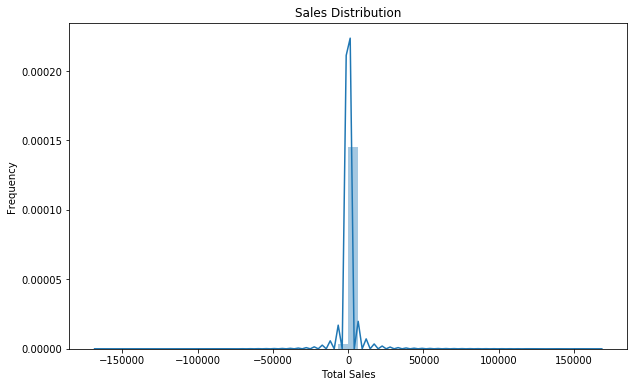

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取预处理后的数据
file_path = r"C:\Users\huangshiting\Desktop\preprocessed_online_retail.xlsx"
data = pd.read_excel(file_path)

# 计算销售额
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

# 绘制销售额分布图
plt.figure(figsize=(10, 6))
sns.distplot(data['TotalSales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

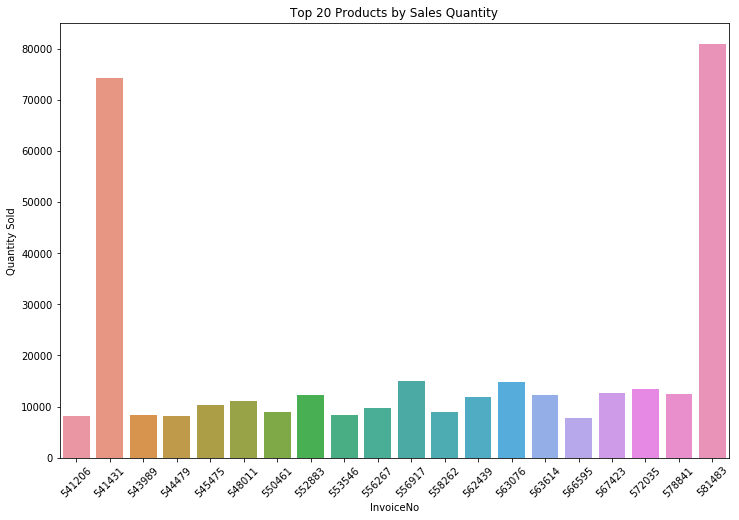

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取预处理后的数据
file_path = r"C:\Users\huangshiting\Desktop\preprocessed_online_retail.xlsx"
data = pd.read_excel(file_path)

# 按产品分组计算销售数量
product_sales = data.groupby('InvoiceNo')['Quantity'].sum().reset_index()

# 绘制产品销售数量分布图
plt.figure(figsize=(12, 8))
sns.barplot(x='InvoiceNo', y='Quantity', data=product_sales.nlargest(20, 'Quantity'))
plt.title('Top 20 Products by Sales Quantity')
plt.xlabel('InvoiceNo')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

In [10]:
import pandas as pd

# 加载原有的Excel文件
file_path = r"C:\Users\huangshiting\Desktop\preprocessed_online_retail.xlsx"
data = pd.read_excel(file_path)

# 确保 Quantity 和 UnitPrice 列存在
print("Columns in the data:", data.columns)

# 计算销售额
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

# 确保 TotalSales 列存在
print("Columns in the data after calculating TotalSales:", data.columns)

# 保存更新后的数据到原文件
data.to_excel(file_path, index=False)

print(f"Updated data has been saved to {file_path}")

Columns in the data: Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Quantity', 'UnitPrice'], dtype='object')
Columns in the data after calculating TotalSales: Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Quantity', 'UnitPrice',
       'TotalSales'],
      dtype='object')
Updated data has been saved to C:\Users\huangshiting\Desktop\preprocessed_online_retail.xlsx


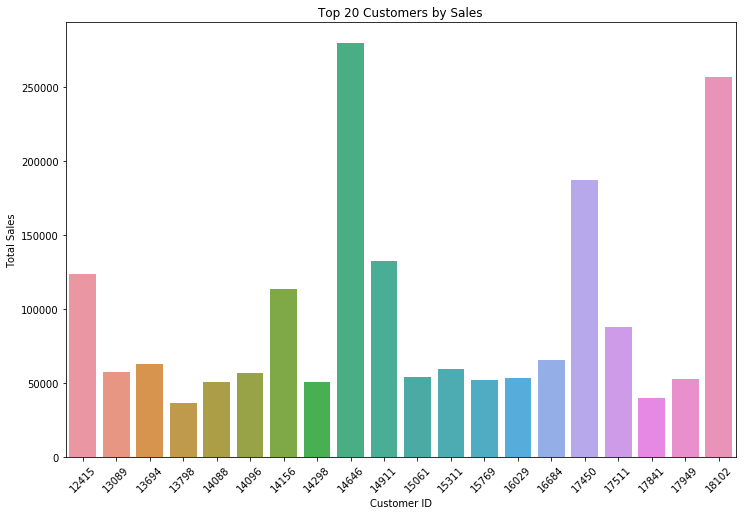

In [11]:
# 按客户分组计算销售额
customer_sales = data.groupby('CustomerID')['TotalSales'].sum().reset_index()

# 绘制客户销售额分布图
plt.figure(figsize=(12, 8))
sns.barplot(x='CustomerID', y='TotalSales', data=customer_sales.nlargest(20, 'TotalSales'))
plt.title('Top 20 Customers by Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

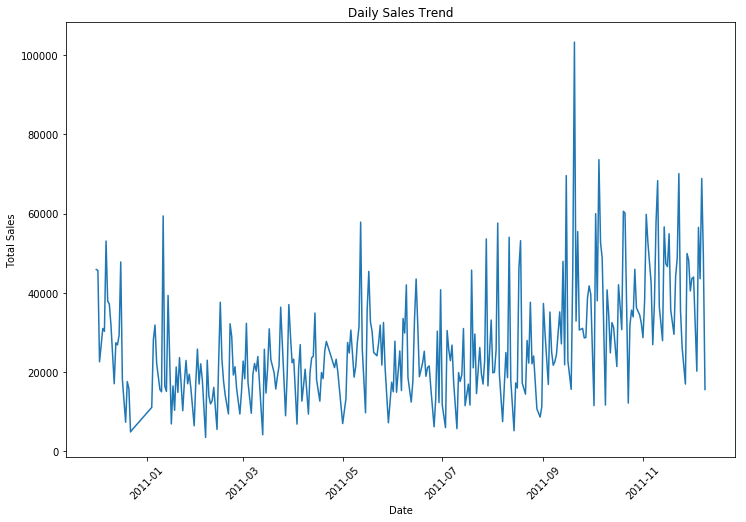

In [13]:
# 将日期列转换为日期格式
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# 按日期分组计算每日销售额
daily_sales = data.groupby(data['InvoiceDate'].dt.date)['TotalSales'].sum().reset_index()

# 绘制每日销售额趋势图
plt.figure(figsize=(12, 8))
sns.lineplot(x='InvoiceDate', y='TotalSales', data=daily_sales)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

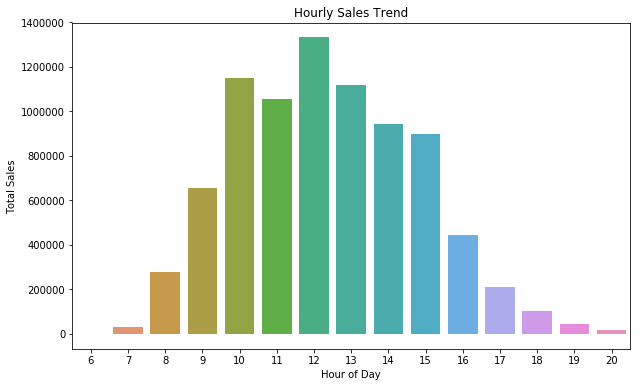

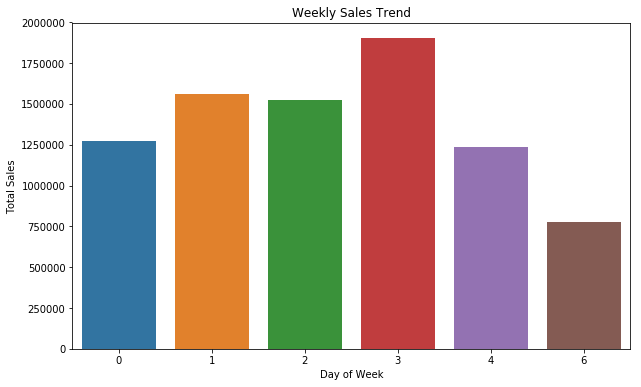

In [15]:
# 提取小时和星期信息
data['Hour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek

# 按小时分组计算销售额
hourly_sales = data.groupby('Hour')['TotalSales'].sum().reset_index()

# 按星期分组计算销售额
weekly_sales = data.groupby('DayOfWeek')['TotalSales'].sum().reset_index()

# 绘制小时销售趋势图
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='TotalSales', data=hourly_sales)
plt.title('Hourly Sales Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.show()

# 绘制星期销售趋势图
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='TotalSales', data=weekly_sales)
plt.title('Weekly Sales Trend')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()

Original Data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Preprocessed Data:
  InvoiceNo         InvoiceDate  CustomerID  Quantity  UnitPrice  TotalSales
0    536365 2010-12-01 08:26:00       17850         6       2.55       15.30


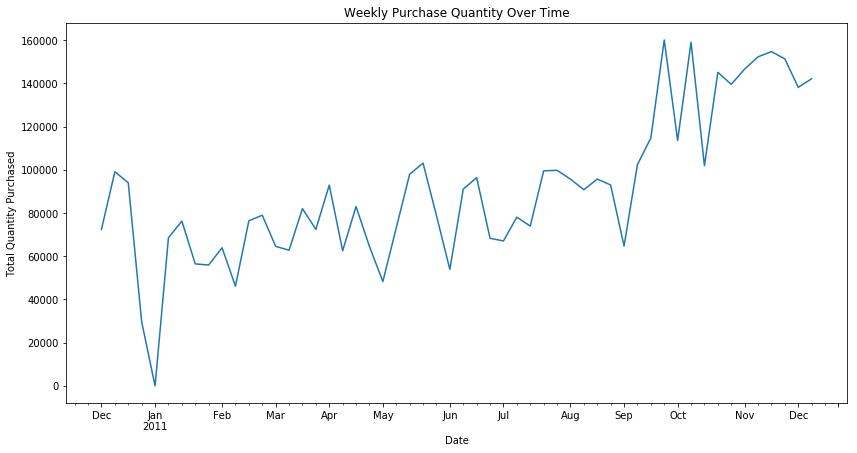

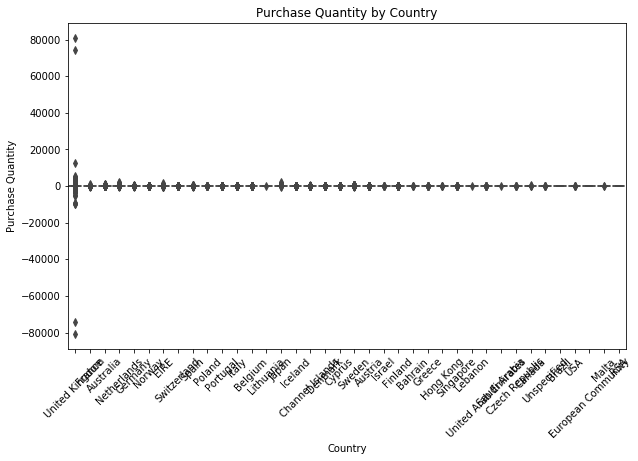

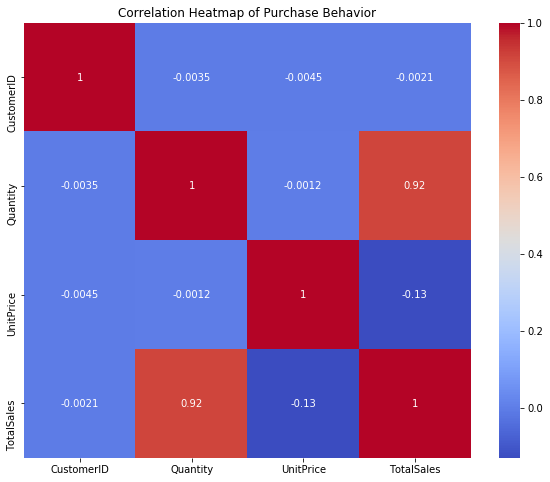

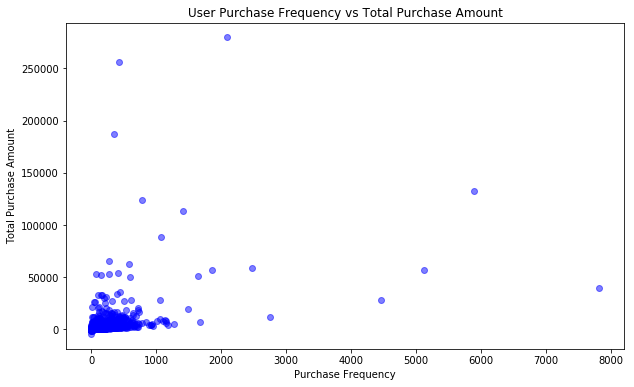

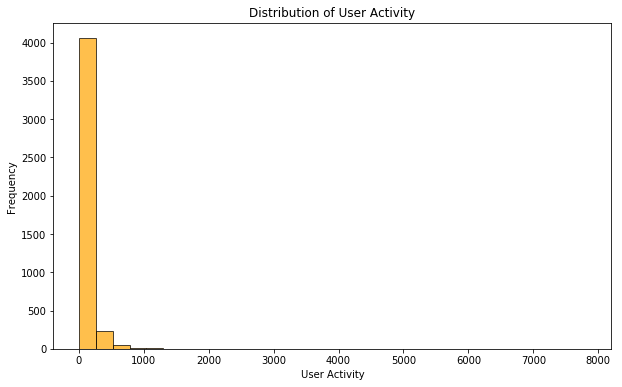

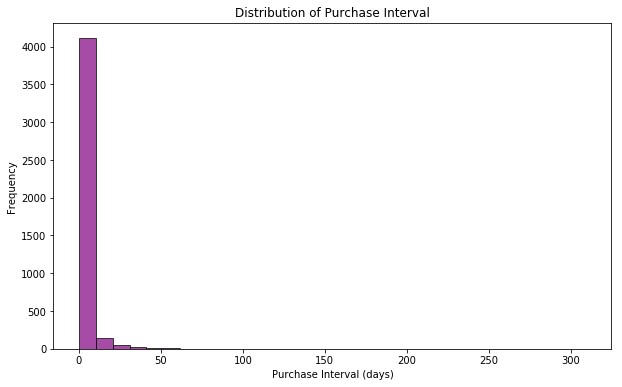

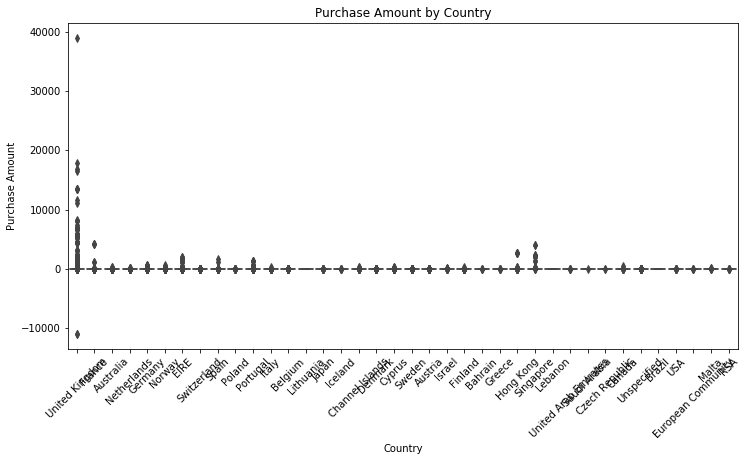

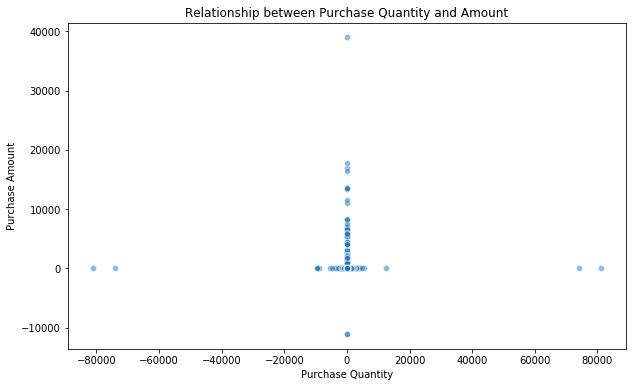

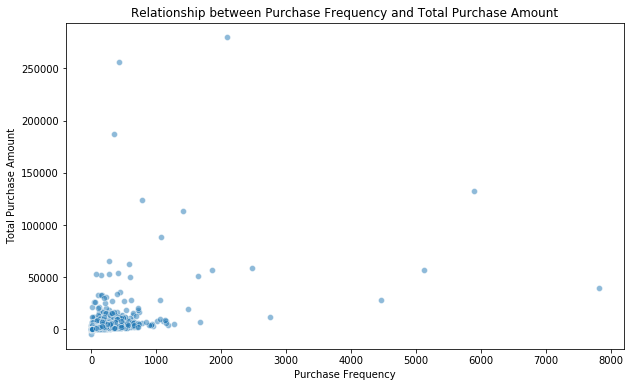

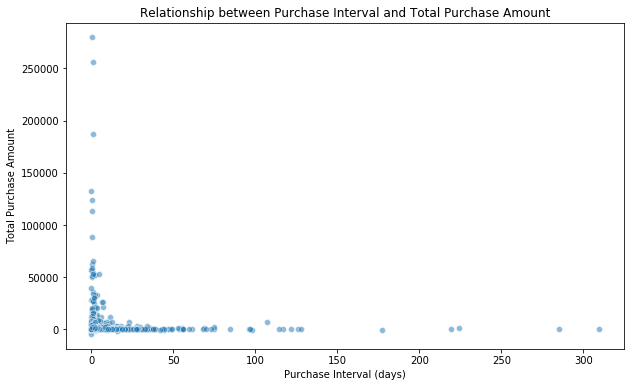

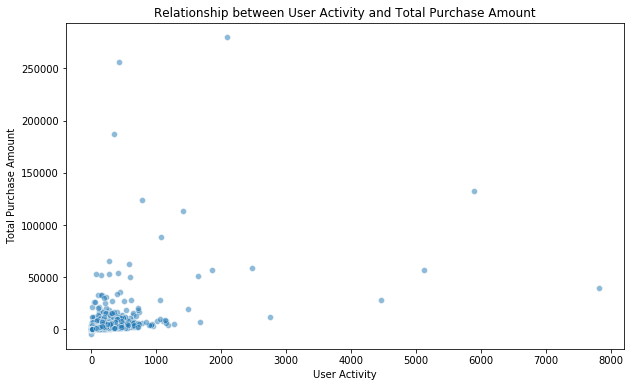

In [8]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置文件路径
file_paths = {
    "original_data": r"C:\Users\huangshiting\Desktop\online_retail.xlsx",
    "preprocessed_data": r"C:\Users\huangshiting\Desktop\preprocessed_online_retail.xlsx",
    "stats_data": r"C:\Users\huangshiting\Desktop\stats_online_retail.xlsx",
    "user_features": r"C:\Users\huangshiting\Desktop\user_features.xlsx"
}

# 读取数据
original_data = pd.read_excel(file_paths["original_data"])
preprocessed_data = pd.read_excel(file_paths["preprocessed_data"])
stats_data = pd.read_excel(file_paths["stats_data"])
user_features = pd.read_excel(file_paths["user_features"])

# 显示数据的前几行以确认读取成功
print("Original Data:")
print(original_data.head())
print("\nPreprocessed Data:")
print(preprocessed_data.head())
print("\nStats Data:")
print(stats_data.head())
print("\nUser Features:")
print(user_features.head())

# 检查列名
print("\nColumns in original_data:")
print(original_data.columns)
print("\nColumns in user_features:")
print(user_features.columns)

# 数据可视化
# 1. 用户购买行为的时间序列分析（使用预处理数据）
preprocessed_data['InvoiceDate'] = pd.to_datetime(preprocessed_data['InvoiceDate'])
preprocessed_data.set_index('InvoiceDate', inplace=True)
plt.figure(figsize=(14, 7))
preprocessed_data.resample('W').sum()['Quantity'].plot()
plt.title('Weekly Purchase Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Purchased')
plt.show()

# 2. 用户购买行为的箱线图分析（使用原始数据）
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Quantity', data=original_data)
plt.title('Purchase Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Purchase Quantity')
plt.xticks(rotation=45)
plt.show()

# 3. 用户购买行为的相关性热力图（使用预处理数据）
plt.figure(figsize=(10, 8))
sns.heatmap(preprocessed_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Purchase Behavior')
plt.show()

# 4. 用户特征分析（使用用户特征数据）
plt.figure(figsize=(10, 6))
plt.scatter(user_features['PurchaseFrequency'], user_features['TotalPurchaseAmount'], c='blue', alpha=0.5)
plt.title('User Purchase Frequency vs Total Purchase Amount')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Purchase Amount')
plt.show()

# 5. 用户活跃度分析（使用用户特征数据）
plt.figure(figsize=(10, 6))
plt.hist(user_features['UserActivity'], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of User Activity')
plt.xlabel('User Activity')
plt.ylabel('Frequency')
plt.show()

# 6. 用户购买间隔时间分析（使用用户特征数据）
plt.figure(figsize=(10, 6))
plt.hist(user_features['PurchaseInterval'], bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribution of Purchase Interval')
plt.xlabel('Purchase Interval (days)')
plt.ylabel('Frequency')
plt.show()

# 7. 不同国家的购买金额分布（使用原始数据）
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='UnitPrice', data=original_data)
plt.title('Purchase Amount by Country')
plt.xlabel('Country')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.show()

# 8. 购买数量与购买金额的关系（使用原始数据）
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=original_data, alpha=0.5)
plt.title('Relationship between Purchase Quantity and Amount')
plt.xlabel('Purchase Quantity')
plt.ylabel('Purchase Amount')
plt.show()

# 9. 用户购买金额与购买频率的关系（使用用户特征数据）
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PurchaseFrequency', y='TotalPurchaseAmount', data=user_features, alpha=0.5)
plt.title('Relationship between Purchase Frequency and Total Purchase Amount')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Purchase Amount')
plt.show()

# 10. 用户购买金额与购买间隔时间的关系（使用用户特征数据）
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PurchaseInterval', y='TotalPurchaseAmount', data=user_features, alpha=0.5)
plt.title('Relationship between Purchase Interval and Total Purchase Amount')
plt.xlabel('Purchase Interval (days)')
plt.ylabel('Total Purchase Amount')
plt.show()

# 11. 用户购买金额与用户活跃度的关系（使用用户特征数据）
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UserActivity', y='TotalPurchaseAmount', data=user_features, alpha=0.5)
plt.title('Relationship between User Activity and Total Purchase Amount')
plt.xlabel('User Activity')
plt.ylabel('Total Purchase Amount')
plt.show()